In [ ]:
%%capture
pip install --upgrade snowflake-connector-python

In [ ]:
import snowflake.connector

In [ ]:
# import getpass 

# # username = getpass.getpass("Enter username:")
# # password = getpass.getpass("Enter password:")


In [ ]:
conn = snowflake.connector.connect(
                user='',
                password='',
                account='',
                warehouse='COMPUTE_WH',
                database='SNOWFLAKE_SAMPLE_DATA',
                schema='TPCH_SF1'
                )

curs = conn.cursor()

result = curs.execute("SELECT * FROM CUSTOMER LIMIT 10")

In [ ]:
result.fetch_pandas_all()

,C_CUSTKEY,C_NAME,C_ADDRESS,C_NATIONKEY,C_PHONE,C_ACCTBAL,C_MKTSEGMENT,C_COMMENT
0,60001,Customer#000060001,9Ii4zQn9cX,14,24-678-784-9652,9957.56,HOUSEHOLD,l theodolites boost slyly at the platelets: pe...
1,60002,Customer#000060002,ThGBMjDwKzkoOxhz,15,25-782-500-8435,742.46,BUILDING,beans. fluffily regular packages
2,60003,Customer#000060003,"Ed hbPtTXMTAsgGhCr4HuTzK,Md2",16,26-859-847-7640,2526.92,BUILDING,fully pending deposits sleep quickly. blithely...
3,60004,Customer#000060004,"NivCT2RVaavl,yUnKwBjDyMvB42WayXCnky",10,20-573-674-7999,7975.22,AUTOMOBILE,furiously above the ironic packages. slyly br...
4,60005,Customer#000060005,"1F3KM3ccEXEtI, B22XmCMOWJMl",12,22-741-208-1316,2504.74,MACHINERY,express instructions sleep quickly. ironic bra...
5,60006,Customer#000060006,3isiXW651fa8p,22,32-618-195-8029,9051.40,MACHINERY,carefully quickly even theodolites. boldly
6,60007,Customer#000060007,"sp6KJmx,TiSWbMPvhkQwFwTuhSi4a5OLNImpcGI",12,22-491-919-9470,6017.17,FURNITURE,bold packages. regular sheaves mold. blit
7,60008,Customer#000060008,3VteHZYOfbgQioA96tUeL0R7i,2,12-693-562-7122,5621.44,AUTOMOBILE,nal courts. carefully regular Tiresias lose qu...
8,60009,Customer#000060009,S60sNpR6wnacPBLeOxjxhvehf,9,19-578-776-2699,9548.01,FURNITURE,efully even dependencies haggle furiously alon...
9,60010,Customer#000060010,c4vEEaV1tdqLdw2oVuXp BN,21,31-677-809-6961,3497.91,HOUSEHOLD,fter the quickly silent requests. slyly specia...


In [ ]:
import pandas as pd

In [ ]:
%%time
query = "SELECT * FROM LINEITEM"

lineitem_df = pd.read_sql(query, conn)
lineitem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001215 entries, 0 to 6001214
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   L_ORDERKEY       int64  
 1   L_PARTKEY        int64  
 2   L_SUPPKEY        int64  
 3   L_LINENUMBER     int64  
 4   L_QUANTITY       float64
 5   L_EXTENDEDPRICE  float64
 6   L_DISCOUNT       float64
 7   L_TAX            float64
 8   L_RETURNFLAG     object 
 9   L_LINESTATUS     object 
 10  L_SHIPDATE       object 
 11  L_COMMITDATE     object 
 12  L_RECEIPTDATE    object 
 13  L_SHIPINSTRUCT   object 
 14  L_SHIPMODE       object 
 15  L_COMMENT        object 
dtypes: float64(4), int64(4), object(8)
memory usage: 732.6+ MB
CPU times: user 1min 1s, sys: 3.08 s, total: 1min 4s
Wall time: 1min 3s


In [ ]:
lineitem_df

,L_ORDERKEY,L_PARTKEY,L_SUPPKEY,L_LINENUMBER,L_QUANTITY,L_EXTENDEDPRICE,L_DISCOUNT,L_TAX,L_RETURNFLAG,L_LINESTATUS,L_SHIPDATE,L_COMMITDATE,L_RECEIPTDATE,L_SHIPINSTRUCT,L_SHIPMODE,L_COMMENT
0,3000001,14406,4407,1,22.0,29048.80,0.02,0.06,A,F,1993-01-31,1993-03-16,1993-02-28,DELIVER IN PERSON,AIR,uriously silent patterns across the f
1,3000002,34422,4423,1,45.0,61038.90,0.06,0.04,N,O,1995-09-28,1995-08-27,1995-10-15,NONE,AIR,al braids wake idly regular a
2,3000002,115068,91,2,48.0,51986.88,0.09,0.00,N,O,1995-09-25,1995-09-21,1995-10-01,TAKE BACK RETURN,AIR,ld requests kindle unusual platelet
3,3000002,147647,162,3,17.0,28808.88,0.06,0.04,N,O,1995-10-25,1995-09-22,1995-10-29,TAKE BACK RETURN,FOB,"foxes across the ironic, final deposi"
4,3000002,98797,8798,4,9.0,16162.11,0.03,0.01,N,O,1995-10-30,1995-09-17,1995-11-28,DELIVER IN PERSON,TRUCK,y special pinto beans. slyly ironic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001210,4800000,139589,9590,2,30.0,48857.40,0.01,0.08,A,F,1994-04-19,1994-05-10,1994-04-23,TAKE BACK RETURN,RAIL,ses believe furiou
6001211,4800000,62954,7967,3,11.0,21086.45,0.07,0.05,R,F,1994-04-09,1994-04-13,1994-04-11,DELIVER IN PERSON,SHIP,detect among
6001212,4800000,55479,7985,4,2.0,2868.94,0.02,0.03,R,F,1994-06-27,1994-06-07,1994-06-30,NONE,MAIL,regular deposits affix blithely eve
6001213,4800000,28487,8488,5,28.0,39633.44,0.00,0.08,R,F,1994-06-25,1994-05-26,1994-07-23,NONE,TRUCK,ress packages-- i


In [ ]:
lineitem_df.groupby('L_SHIPMODE')['L_SHIPINSTRUCT'].count()

L_SHIPMODE
AIR        858104
FOB        857324
MAIL       857401
RAIL       856484
REG AIR    856868
SHIP       858036
TRUCK      856998
Name: L_SHIPINSTRUCT, dtype: int64

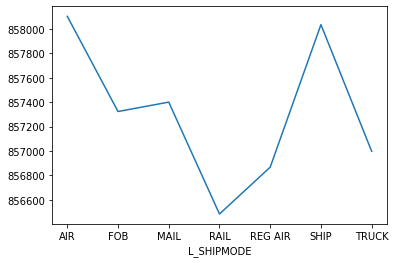

In [ ]:
lineitem_df.groupby('L_SHIPMODE')['L_SHIPINSTRUCT'].count().plot()

In [ ]:
%%time
query = "SELECT L_SHIPMODE, COUNT(*) FROM LINEITEM GROUP BY L_SHIPMODE;"

lineitem_df = pd.read_sql(query, conn)

CPU times: user 14.3 ms, sys: 0 ns, total: 14.3 ms
Wall time: 981 ms


In [ ]:
lineitem_df

,L_SHIPMODE,COUNT(*)
0,TRUCK,856998
1,AIR,858104
2,SHIP,858036
3,MAIL,857401
4,RAIL,856484
5,FOB,857324
6,REG AIR,856868
